## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring plots display inline in Jupyter Notebook
%matplotlib inline

In [3]:
# Step 1: Loading the Customer Demographics Data
cust_demo = pd.read_excel('Raw_data.xlsx', sheet_name='CustomerDemographic')

In [5]:
# Checking first 5 records from Customer Demographics Data
cust_demo.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
# Step 2: Exploring the dataset information
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [7]:
#  convert the 'Date' column to datetime format
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])

The data types of the columns look fine. However, the 'default' column is irrelevant and should be dropped from the dataset. Let's check the data quality and apply the data cleaning process wherever applicable to clean our dataset before performing any analysis

## Total Records

In [8]:
# Step 3: Displaying total records and columns
print(f"Total records: {cust_demo.shape[0]}")
print(f"Total columns: {cust_demo.shape[1]}")

Total records: 4000
Total columns: 13


## Numeric Columns and Non-Numeric Columns

In [9]:
# Step 4: Identifying numeric and non-numeric columns
df_numeric = cust_demo.select_dtypes(include=[np.number])
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
print(f"Numeric columns: {df_numeric.columns.values}")
print(f"Non-numeric columns: {df_non_numeric.columns.values}")

Numeric columns: ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
Non-numeric columns: ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


## Dropping Irrelevant Columns 

The 'default' column is irrelevant; therefore, it should be dropped from the dataset.

In [10]:
# Dropping the 'default' column from the DataFrame
cust_demo.drop(labels='default', axis=1, inplace=True)

In [12]:
# Display the DataFrame after dropping the column
print("The 'default' column has been dropped.")
cust_demo.head()

The 'default' column has been dropped.


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


## 2. Missing Values Check

We will check for the presence of any missing values in the dataset. If missing values are present in a particular feature, we will determine the appropriate action to take. Depending on the situation, a feature may either be dropped (if a significant amount of data is missing) or an appropriate value will be imputed for the feature column with missing values.

In [13]:
# Step 5: Checking for missing values
print("Missing values in each column:")
print(cust_demo.isnull().sum())

Missing values in each column:
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64


In [12]:
# Percentage of missing values
print("Percentage of missing values in each column:\n", cust_demo.isnull().mean() * 100)

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

Here it is observed that columns like gender, DOB, jop_title, jop_industry_category and tenure have missing values.

# 2.1 Last Name

In [17]:
# Checking for records where last_name is missing and assessing the presence of first_name and customer_id
missing_last_name_records = cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']]

Since All customers have a customer_id and First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last name with 'None'

In [19]:
# Displaying the count of missing values in first_name and customer_id for these records
missing_counts = missing_last_name_records.isnull().sum()

# Output the counts
print("Missing values in first_name and customer_id where last_name is missing:")
print(missing_counts)

Missing values in first_name and customer_id where last_name is missing:
first_name     0
customer_id    0
dtype: int64


In [20]:
# Filling missing values in the last_name column with 'None'
cust_demo['last_name'].fillna('Unknown', inplace=True)

In [21]:
cust_demo['last_name'].isnull().sum()

np.int64(0)

Currently, there are no missing values in the last_name column.


## 2.2 Date of Birth

In [22]:
# Count the number of records with missing values in the 'DOB' column
missing_dob_count = cust_demo['DOB'].isnull().sum()
print(f"Number of records with missing DOB: {missing_dob_count}")


Number of records with missing DOB: 87


In [23]:
# Calculate the percentage of missing values in the 'DOB' column
round(cust_demo['DOB'].isnull().mean() * 100)


2

Since less than 5% of the data has a null value for the date of birth, we can safely remove the records where the date of birth is null.

In [19]:
# Identify the indices of records where the 'DOB' column has null values
dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index

# Print the indices of records with null DOB
print(dob_index_drop)


Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')


In [26]:
# Drop records from the DataFrame 'cust_demo' using the indices identified for null 'DOB' values
cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)


In [21]:
# Count the number of null values in the 'DOB' column of the cust_demo DataFrame
cust_demo['DOB'].isnull().sum()

np.int64(0)

Currently, there are no missing values in the DOB column.

## Creating Age Column to Check for Further Discrepancies in Data.


In [28]:
# Creating Age Column
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust_demo['Age'] = cust_demo['DOB'].apply(age)

<Axes: xlabel='Age', ylabel='Count'>

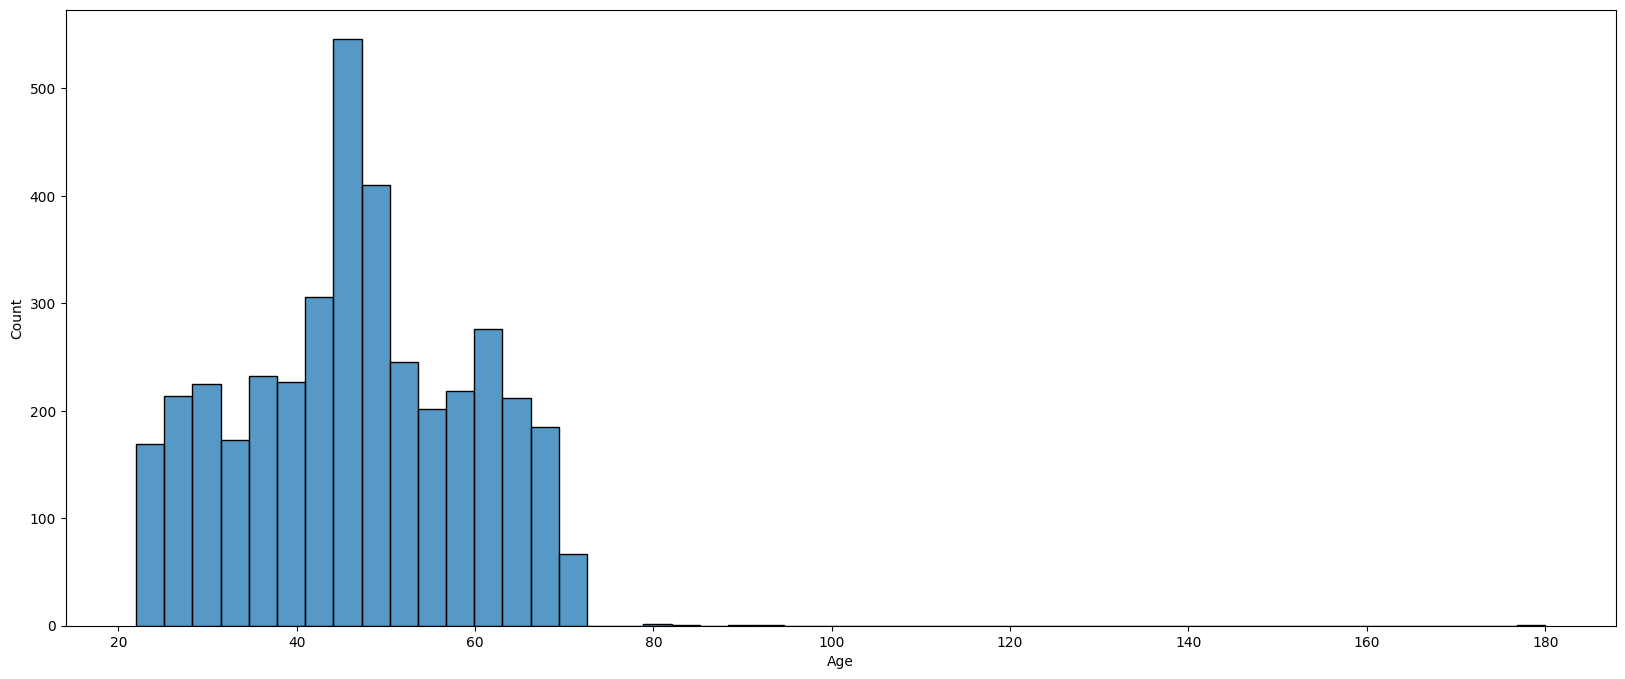

In [29]:
# Visualization to find out the Age Distribution
plt.figure(figsize=(20, 8))
sns.histplot(cust_demo['Age'], bins=50, kde=False)

Statistics of the Age column

In [30]:
# Statistics of the Age column
cust_demo['Age'].describe()

count    3913.000000
mean       46.727575
std        12.801453
min        22.000000
25%        37.000000
50%        47.000000
75%        56.000000
max       180.000000
Name: Age, dtype: float64

Here, we find that there is only one customer with an age of 177. Clearly, this is an outlier since the 75th percentile of age is 53.

In [32]:
# Identifying outlier in Age
age_index_drop = cust_demo[cust_demo['Age'] > 100].index


Here we see a customer with age 177 which is an outlier. hencewe need to remove the records.

Here we see a customer with age 177 which is an outlier. hence we need to remove this record.

In [33]:
age_index_drop = cust_demo[cust_demo['Age'] > 100].index
cust_demo.drop(index=age_index_drop, inplace=True, axis=0)

## 2.3 Tenure

When the Date of Birth (DOB) was null, the tenure was also null. Therefore, after removing records with null DOBs from the DataFrame, the corresponding null tenures were also removed. This step ensures that our dataset is clean and that we only work with complete records that can be used for further analysis.

In [34]:
cust_demo['tenure'].isnull().sum()

np.int64(0)

There are currently no missing values in the Tenure column.

## 2.4 Job Title

In [37]:
# Fetching records where the job title is missing.
cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,63
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,58
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,48
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,70
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0,46
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0,45
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0,50
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,No,7.0,60


Since 13% of the values in the job_title column are missing, we will replace the null values with the string "Missing."

In [39]:
# Replacing missing values in the job_title column with the string 'Missing'
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)



In [31]:
cust_demo['job_title'].isnull().sum()

np.int64(0)

Currently, there are no missing values for the job_title column.

## 2.5 Job Industry Category

In [40]:
# Fetching records where job industry category is missing
cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,47
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,62
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,47
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,62
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,NaN,Mass Customer,N,Yes,11.0,56
3973,3974,Misha,Ranklin,Female,82,1961-02-11,Technical Writer,NaN,Affluent Customer,N,Yes,9.0,63
3975,3976,Gretel,Chrystal,Female,0,1957-11-20,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0,66
3982,3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,N,Yes,9.0,59


Since the percentage of missing values in the Job Industry Category column is 16%, we will replace the null values with the string 'Missing'.

In [33]:
# Replacing missing values in the job_industry_category column with the string 'Missing'
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [34]:
cust_demo['job_industry_category'].isnull().sum()

np.int64(0)

Finally, there are no missing values remaining in the dataset.

In [35]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [36]:
print('Total records after removing Missing Values : {}'.format(cust_demo.shape[0]))

Total records after removing Missing Values : 3912


## 3. Inconsistency Check in Data

We will check for inconsistent data or type errors in the categorical columns. The columns to be checked are 'gender', 'wealth_segment', 'deceased_indicator', and 'own_car'.

## 3.1 Gender

In [42]:
# Standardizing gender values
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

There are inconsistent entries in the gender column, including spelling mistakes and incorrect types. Specifically, the value 'M' will be replaced with 'Male', 'F' will be replaced with 'Female', and 'Femal' will also be replaced with 'Female'.

In [41]:
def replace_gender_names(gender):
    # Making gender as Male and Female as standards
    if gender == 'M':
        return 'Male'
    elif gender == 'F':
        return 'Female'
    elif gender == 'Femal':
        return 'Female'
    else:
        return gender

# Apply the function to the 'gender' column
cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)


In [42]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

The inconsistent data, including spelling mistakes and incorrect types in the gender column, have been removed.

## 3.2 Wealth Segment

In [43]:
# Standardizing wealth_segment values
cust_demo['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

There is no inconsistent data in the wealth segment column.

## 3.3 Deceased Indicator

In [44]:
# Standardizing deceased_indicator values
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

There is no inconsistent data in the deceased_indicator  column.

## Owms a car

In [45]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

There is no inconsistent data in the owns_car  column.

## 4. Duplication Checks

We need to ensure that there are no duplicate records in the dataset, as this may lead to errors in data analysis due to poor data quality. If there are duplicate rows of data, we need to drop such records. To check for duplicate records, we should first remove the primary key column from the dataset and then apply the drop_duplicates() function provided by Python.

In [47]:
# Create a new DataFrame by dropping the 'customer_id' column and removing duplicates
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

# Print the number of records after removing the 'customer_id' (primary key) and duplicates
print('Number of records after removing customer_id (pk) and duplicates: {}'.format(cust_demo_dedupped.shape[0]))

# Print the number of records in the original dataset
print('Number of records in original dataset: {}'.format(cust_demo.shape[0]))


Number of recotrds after removing customer_id (pk), duplicate : 3912
number of records in original dataset : 3912


Since both numbers are the same, there are no duplicate records in the dataset.

## 5. Exporting the Cleaned Customer Demographic Dataset to CSV

The Customer Demographic dataset is now clean. Therefore, we can export the data to a CSV file to facilitate further data analysis of customer segments by joining it with other tables.

In [48]:
# Exporting the cleaned Customer Demographic dataset to a CSV file
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)
